Notebook to take the shark_geo data, select the WA cases and split the WA cases into Northern WA, metro WA and Southern WA.  
This split is based on latitude.  
Data is then exported to shark_attack_wa.csv

In [1]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# read in data
filename = "shark_geo.csv"
shark_df = pd.read_csv(filename)
shark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      161 non-null    int64  
 1   Case Number     161 non-null    object 
 2   Date            161 non-null    object 
 3   Year            161 non-null    float64
 4   Type            161 non-null    object 
 5   Country         161 non-null    object 
 6   Area            161 non-null    object 
 7   Location        161 non-null    object 
 8   Activity        155 non-null    object 
 9   Sex             156 non-null    object 
 10  Age             116 non-null    object 
 11  Injury          160 non-null    object 
 12  Fatal (Y/N)     154 non-null    object 
 13  Time            136 non-null    object 
 14  Species         104 non-null    object 
 15  pdf             161 non-null    object 
 16  href formula    161 non-null    object 
 17  href            161 non-null    obj

In [3]:
shark_df.head()

,Unnamed: 0,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,...,Time,Species,pdf,href formula,href,Case Number.1,Case Number.2,original order,lat,lng
0,0,2021.07.19,19-Jul-2021,2021.0,Unprovoked,AUSTRALIA,Western Australia,Rottnest Island,Surfing,M,...,12h30,"White shark, 3m",2021.07.19-Rottnest.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.19,2021.07.19,6668,-32.006368,115.507300
1,1,2021.07.05,05-Jul-2021,2021.0,Unprovoked,AUSTRALIA,New South Wales,Crescent Head,Surfing,M,...,16h30,NaN,2021.07.05-Hoffman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.05,2021.07.05,6661,-31.176975,152.910666
2,2,2021.06.23,23-Jun-2021,2021.0,Unprovoked,AUSTRALIA,Western Australia,Gum Tree Bay,Surfing,M,...,14h00,NaN,2021.06.23-Dodds.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.06.23,2021.06.23,6655,-29.784444,114.962222
3,3,2021.06.11,11-Jun-2021,2021.0,Unprovoked,AUSTRALIA,Western Australia,Five Fingers Reef,Snorkeling,M,...,11h00,"Bronze whaler shark, 2 m",2021.06.11-Bartlett.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.06.11,2021.06.11,6649,-23.179746,113.765707
4,4,2021.05.21,21-May-2021,2021.0,Unprovoked,AUSTRALIA,Western Australia,Quondong Beach,Spearfishing,M,...,11h20,NaN,2021.05.21-Highlands.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.05.21,2021.05.21,6646,-17.580385,122.157131


In [4]:
# remove unwanted columns
shark_df = shark_df.drop([ 'pdf', 'href formula','href', 'Case Number.1', 'Case Number.2', 'original order'], axis = 1)

In [5]:
# remove data from 2021
shark_df = shark_df.loc[shark_df['Year']<2021]

In [24]:
shark_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 16 to 160
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   145 non-null    int64  
 1   Case Number  145 non-null    object 
 2   Date         145 non-null    object 
 3   Year         145 non-null    float64
 4   Type         145 non-null    object 
 5   Country      145 non-null    object 
 6   Area         145 non-null    object 
 7   Location     145 non-null    object 
 8   Activity     140 non-null    object 
 9   Sex          140 non-null    object 
 10  Age          103 non-null    object 
 11  Injury       144 non-null    object 
 12  Fatal (Y/N)  138 non-null    object 
 13  Time         120 non-null    object 
 14  Species      94 non-null     object 
 15  lat          145 non-null    float64
 16  lng          145 non-null    float64
dtypes: float64(3), int64(1), object(13)
memory usage: 20.4+ KB


In [7]:
# only use data for WA
shark_wa = shark_df.loc[shark_df['Area']=="Western Australia"]
shark_wa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 16 to 150
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   40 non-null     int64  
 1   Case Number  40 non-null     object 
 2   Date         40 non-null     object 
 3   Year         40 non-null     float64
 4   Type         40 non-null     object 
 5   Country      40 non-null     object 
 6   Area         40 non-null     object 
 7   Location     40 non-null     object 
 8   Activity     37 non-null     object 
 9   Sex          38 non-null     object 
 10  Age          22 non-null     object 
 11  Injury       39 non-null     object 
 12  Fatal (Y/N)  39 non-null     object 
 13  Time         31 non-null     object 
 14  Species      26 non-null     object 
 15  lat          40 non-null     float64
 16  lng          40 non-null     float64
dtypes: float64(3), int64(1), object(13)
memory usage: 5.6+ KB


In [8]:
shark_wa_region = shark_wa.reset_index(drop = True)

In [9]:
shark_wa_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   40 non-null     int64  
 1   Case Number  40 non-null     object 
 2   Date         40 non-null     object 
 3   Year         40 non-null     float64
 4   Type         40 non-null     object 
 5   Country      40 non-null     object 
 6   Area         40 non-null     object 
 7   Location     40 non-null     object 
 8   Activity     37 non-null     object 
 9   Sex          38 non-null     object 
 10  Age          22 non-null     object 
 11  Injury       39 non-null     object 
 12  Fatal (Y/N)  39 non-null     object 
 13  Time         31 non-null     object 
 14  Species      26 non-null     object 
 15  lat          40 non-null     float64
 16  lng          40 non-null     float64
dtypes: float64(3), int64(1), object(13)
memory usage: 5.4+ KB


In [28]:
# convert Year to integer (for graphing later on)
shark_wa_region['Year'] = shark_wa_region['Year'].astype(int)

In [30]:
# create column for region data
shark_wa_region['region']=""

In [31]:
# Split into regions
shark_wa_region["region"] = shark_wa_region.lat.apply(lambda x: "Northern" if x>-31.5471024260016 else ("Metro" if x> -32.6343558722623 else "Southern"))

In [32]:
shark_wa_region.head()

,Unnamed: 0,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,lat,lng,region
0,16,2020.12.09,09-Dec-2020,2020,Unprovoked,AUSTRALIA,Western Australia,Cable Beach,Surfing,M,NaN,"No injury, Board bitten",N,07h00,NaN,-17.931944,122.208056,Northern
1,18,2020.11.22,22-Nov-2020,2020,Unprovoked,AUSTRALIA,Western Australia,Cable Beach,Body boarding,M,59,FATAL,Y,08h40,Bull shark,-17.931944,122.208056,Northern
2,21,2020.10.09,09-Oct-2020,2020,Unprovoked,AUSTRALIA,Western Australia,Kelp Beds Beach (Kelpies),Surfing,M,52,FATAL,Y,10h45,4m shark,-33.832478,121.997072,Southern
3,22,2020.10.04,04-Oct-2020,2020,Unprovoked,AUSTRALIA,Western Australia,"Toms Surf break, Hamersley Pool, North Beach, ...",Surfing,M,17,"No injury, knocked off board when shark grabbe...",N,10h45,Bronze whaler 1.5m,-31.862602,115.752121,Metro
4,28,2020.07.31.a,31-Jul-2020,2020,Unprovoked,AUSTRALIA,Western Australia,Bunker Bay Beach,Surfing,M,28,Lacerations to leg,N,14h15,"White shark, 4m",-33.543638,115.030785,Southern


In [33]:
# export data
shark_wa_region.to_csv("shark_attack_wa.csv")

In [34]:
result = shark_wa_region.groupby(['region'])['Case Number'].count()
result

region
Metro       13
Northern    10
Southern    17
Name: Case Number, dtype: int64

In [35]:
result = shark_wa_region.groupby(['Year','region'])['Case Number'].count()
result

Year  region  
2016  Metro       3
      Northern    2
      Southern    3
2017  Metro       2
      Northern    2
      Southern    4
2018  Metro       5
      Northern    2
      Southern    6
2019  Metro       2
      Northern    1
2020  Metro       1
      Northern    3
      Southern    4
Name: Case Number, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

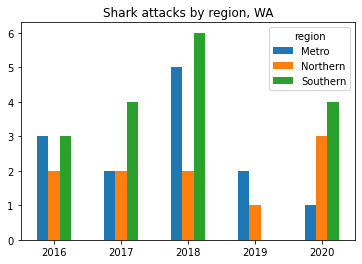

In [39]:
result.unstack().plot(kind='bar')
plt.title("Shark attacks by region, WA")
plt.xlabel("")
plt.xticks(rotation = 0)

In [20]:
result_year_area = result.unstack()
result_year_area =result_year_area.fillna(0)
result_year_area

region,Metro,Northern,Southern
Year,,,
2016.0,3.0,2.0,3.0
2017.0,2.0,2.0,4.0
2018.0,5.0,2.0,6.0
2019.0,2.0,1.0,0.0
2020.0,1.0,3.0,4.0


In [22]:
# export result table as csv
result_year_area.to_csv("attack_year_area.csv")

In [23]:
result_year_area.describe()

region,Metro,Northern,Southern
count,5.000000,5.000000,5.00000
mean,2.600000,2.000000,3.40000
std,1.516575,0.707107,2.19089
min,1.000000,1.000000,0.00000
25%,2.000000,2.000000,3.00000
50%,2.000000,2.000000,4.00000
75%,3.000000,2.000000,4.00000
max,5.000000,3.000000,6.00000
